# Import python library

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

# Suppress warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Sklearn pre-processing

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn import tree
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [4]:
seed = 10

# Training data

In [5]:
app_train = pd.read_csv('dataset/application_train.csv')
print('Training data shape: ', app_train.shape)

Training data shape:  (307511, 122)


# Testing data features

In [6]:
app_test = pd.read_csv('dataset/application_test.csv')
print('Testing data shape: ', app_test.shape)

Testing data shape:  (48744, 121)


# Function to calculate missing values by column

In [7]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

# Missing values statistics

In [8]:
missing_values = missing_values_table(app_train)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


# Create a label encoder object

In [9]:
le = LabelEncoder()
le_count = 0

# Iterate through the columns

In [10]:
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1

In [11]:
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


# One-hot encoding of categorical variables

In [12]:
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

In [13]:
print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [14]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes

In [15]:
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in

In [16]:
app_train['TARGET'] = train_labels

In [17]:
print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [18]:
train_y = app_train['TARGET']

# Drop the target from the training data

In [19]:
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()

# Feature names

In [20]:
features = list(train.columns)

# Copy of the testing data

In [21]:
test = app_test.copy()

# Median imputation of missing values

In [22]:
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1

In [23]:
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data

In [24]:
imputer.fit(train)

SimpleImputer(strategy='median')

# Transform both training and testing data

In [25]:
train = imputer.transform(train)
test = imputer.transform(app_test)

In [26]:
print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 239)
Testing data shape:  (48744, 239)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(train, train_y, test_size=0.33, random_state=seed)

# Repeat with the scaler

In [28]:
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [29]:
print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 239)
Testing data shape:  (48744, 239)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(train, train_y, test_size=0.33, random_state=seed)

In [31]:
log_reg = LogisticRegression(C = 0.0001)
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.0001)

# Get prediction accuracy

In [32]:
crossVal = cross_val_score(log_reg, X_train, y_train, cv=5)
print("Training Cross Validation: %0.2f" % (sum(crossVal) / float(len(crossVal)) * 100), "%")
accuracy = log_reg.score(X_test, y_test)
print("Test Accuraccy: %0.2f" % (accuracy * 100), "%")

Training Cross Validation: 91.93 %
Test Accuraccy: 91.92 %


# F1 Score

In [33]:
y_predicted = log_reg.predict(X_test)
print("F1 Score: %0.2f" % f1_score(y_test, y_predicted))

F1 Score: 0.00


# Confusion Matrix

In [34]:
log_reg_confusion = metrics.confusion_matrix(y_test, y_predicted)

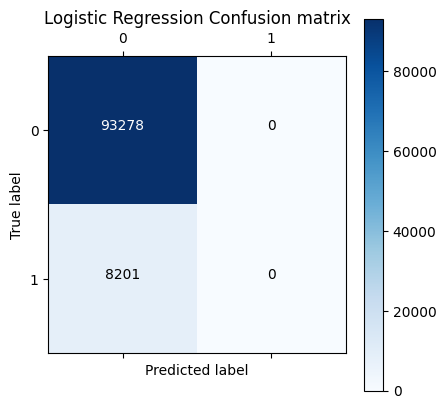

In [35]:
plt.matshow(log_reg_confusion, cmap=plt.cm.Blues)
plt.grid(b=False)
plt.title("Logistic Regression Confusion matrix")
plt.colorbar()
thresh = log_reg_confusion.max() / 2.
for i, j in itertools.product(range(log_reg_confusion.shape[0]), range(log_reg_confusion.shape[1])):
    plt.text(j, i, log_reg_confusion[i, j],
    horizontalalignment="center",
    color="white" if log_reg_confusion[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

scores = log_reg.predict_proba(X_test)[:, 1]

# Roc graph 

In [36]:
fpr, tpr, _ = metrics.roc_curve(y_test, scores)
roc_auc = metrics.auc(fpr, tpr)

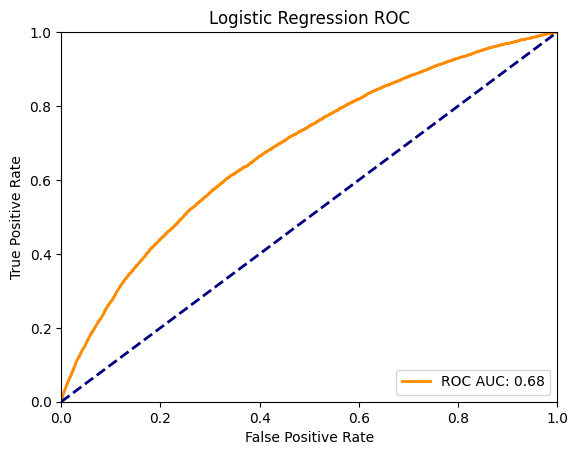

In [37]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC AUC: %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC')
plt.legend(loc="lower right")
plt.show()

# Train decision tree

In [38]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

# Get prediction accuracy

In [39]:
crossVal = cross_val_score(dt, X_train, y_train, cv=5)
print("Training Cross Validation: %0.2f" % (sum(crossVal) / float(len(crossVal)) * 100), "%")
accuracy = dt.score(X_test, y_test)
print("Test Accuraccy: %0.2f" % (accuracy * 100), "%")

Training Cross Validation: 85.26 %
Test Accuraccy: 85.38 %


# F1 Score

In [40]:
y_predicted = dt.predict(X_test)
print("F1 Score: %0.2f" % f1_score(y_test, y_predicted))

F1 Score: 0.15


# Confusion Matrix

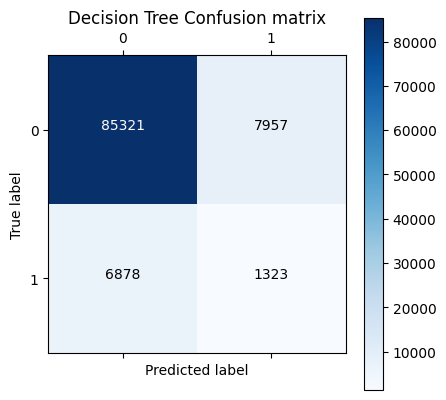

In [41]:
dt_confusion = metrics.confusion_matrix(y_test, y_predicted)
#dt_confusion = dt_confusion.astype('float') / dt_confusion.sum(axis=1)[:, np.newaxis]
plt.matshow(dt_confusion, cmap=plt.cm.Blues)
plt.grid(b=False)
plt.title("Decision Tree Confusion matrix")
plt.colorbar()
thresh = dt_confusion.max() / 2.
for i, j in itertools.product(range(dt_confusion.shape[0]), range(dt_confusion.shape[1])):
    plt.text(j, i, dt_confusion[i, j],
    horizontalalignment="center",
    color="white" if dt_confusion[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

scores = log_reg.predict_proba(X_test)[:, 1]

# Roc graph

In [42]:
scores = dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, scores)
roc_auc = metrics.auc(fpr, tpr)

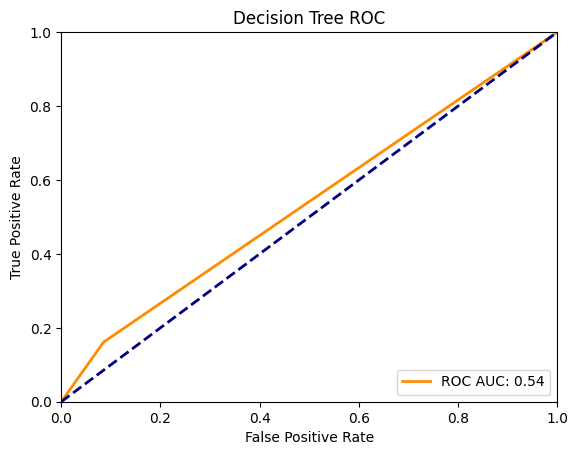

In [43]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC AUC: %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC')
plt.legend(loc="lower right")
plt.show()

# Train SVM

In [44]:
SVM = svm.LinearSVC()
SVM.fit(X_train, y_train)

LinearSVC()

# Get prediction accuracy

In [45]:
crossVal = cross_val_score(SVM, X_train, y_train, cv=5)
print("Training Cross Validation: %0.2f" % (sum(crossVal) / float(len(crossVal)) * 100), "%")
accuracy = SVM.score(X_test, y_test)
print("Test Accuraccy: ", accuracy * 100, "%")

Training Cross Validation: 91.93 %
Test Accuraccy:  91.91852501502774 %


# F1 Score

In [46]:
y_predicted = SVM.predict(X_test)
print("F1 Score: ",f1_score(y_test, y_predicted))

F1 Score:  0.0


# Confusion Matrix

Text(0.5, 0, 'Predicted label')

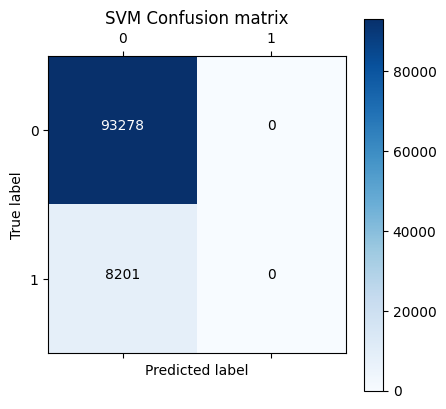

In [47]:
SVM_confusion = metrics.confusion_matrix(y_test, y_predicted)
#SVM_confusion = SVM_confusion.astype('float') / SVM_confusion.sum(axis=1)[:, np.newaxis]
plt.matshow(SVM_confusion, cmap=plt.cm.Blues)
plt.grid(b=False)
plt.title("SVM Confusion matrix")
plt.colorbar()
thresh = SVM_confusion.max() / 2.
for i, j in itertools.product(range(SVM_confusion.shape[0]), range(SVM_confusion.shape[1])):
    plt.text(j, i, SVM_confusion[i, j],
    horizontalalignment="center",
    color="white" if SVM_confusion[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Roc graph 

In [48]:
#scores = SVM.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_predicted)
roc_auc = metrics.auc(fpr, tpr)

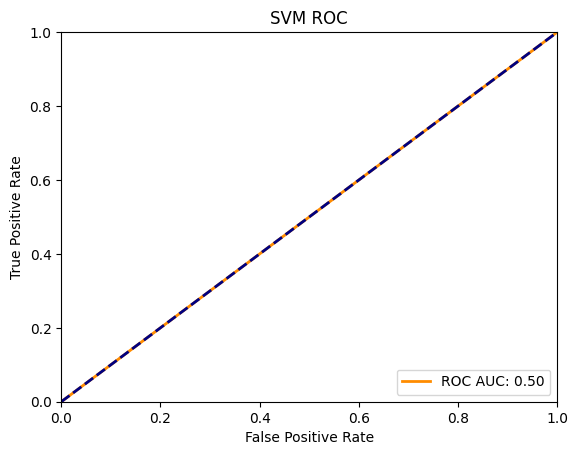

In [49]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC AUC: %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC')
plt.legend(loc="lower right")
plt.show()

# Train Naive Bayes

In [50]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

# Get prediction accuracy

In [51]:
crossVal = cross_val_score(nb, X_train, y_train, cv=5)
print("Training Cross Validation: %0.2f" % (sum(crossVal) / float(len(crossVal)) * 100), "%")
accuracy = nb.score(X_test, y_test)
print("Test Accuraccy: ", accuracy * 100, "%")

Training Cross Validation: 19.33 %
Test Accuraccy:  20.21797613299303 %


# F1 Score

In [52]:
y_predicted = nb.predict(X_test)
print("F1 Score: ",f1_score(y_test, y_predicted))

F1 Score:  0.15576642335766422


# Confusion Matrix

Text(0.5, 0, 'Predicted label')

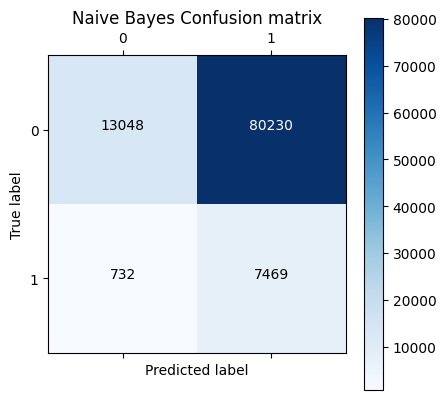

In [53]:
nb_confusion = metrics.confusion_matrix(y_test, y_predicted)
# nb_confusion = nb_confusion.astype('float') / nb_confusion.sum(axis=1)[:, np.newaxis]
plt.matshow(nb_confusion, cmap=plt.cm.Blues)
plt.grid(b=False)
plt.title("Naive Bayes Confusion matrix")
plt.colorbar()
thresh = nb_confusion.max() / 2.
for i, j in itertools.product(range(nb_confusion.shape[0]), range(nb_confusion.shape[1])):
    plt.text(j, i, nb_confusion[i, j],
    horizontalalignment="center",
    color="white" if nb_confusion[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Roc graph

In [54]:
scores = nb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, scores)
roc_auc = metrics.auc(fpr, tpr)

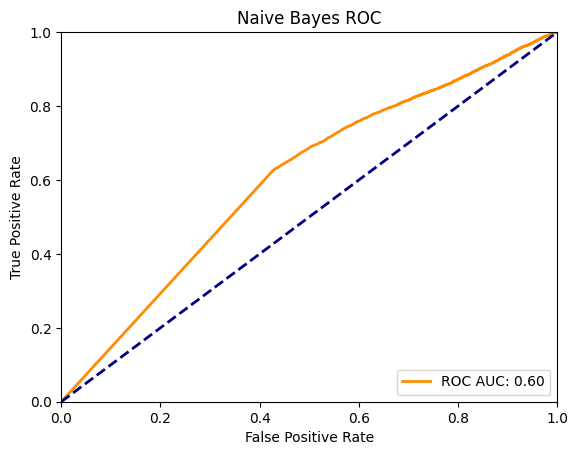

In [55]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC AUC: %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC')
plt.legend(loc="lower right")
plt.show()

# Train Adaboost

In [56]:
boost = AdaBoostClassifier(n_estimators=50)
boost.fit(X_train, y_train)

AdaBoostClassifier()

# Get prediction accuracy

In [57]:
crossVal = cross_val_score(boost, X_train, y_train, cv=5)
print("Training Cross Validation: %0.2f" % (sum(crossVal) / float(len(crossVal)) * 100), "%")
accuracy = boost.score(X_test, y_test)
print("Accuraccy: ", accuracy * 100, "%")

Training Cross Validation: 91.92 %
Accuraccy:  91.91064161057952 %


# F1 Score

In [58]:
y_predicted = boost.predict(X_test)
print("F1 Score: ",f1_score(y_test, y_predicted))

F1 Score:  0.036162968181284484


# Confusion Matrix

Text(0.5, 0, 'Predicted label')

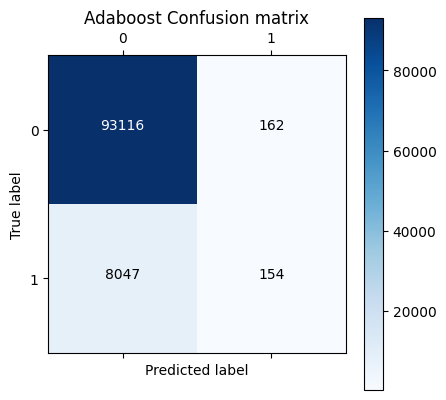

In [59]:
boost_confusion = metrics.confusion_matrix(y_test, y_predicted)
#boost_confusion = boost_confusion.astype('float') / boost_confusion.sum(axis=1)[:, np.newaxis]
plt.matshow(boost_confusion, cmap=plt.cm.Blues)
plt.grid(b=False)
plt.title("Adaboost Confusion matrix")
plt.colorbar()
thresh = boost_confusion.max() / 2.
for i, j in itertools.product(range(boost_confusion.shape[0]), range(boost_confusion.shape[1])):
    plt.text(j, i, boost_confusion[i, j],
    horizontalalignment="center",
    color="white" if boost_confusion[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Roc graph

In [60]:
scores = boost.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, scores)
roc_auc = metrics.auc(fpr, tpr)

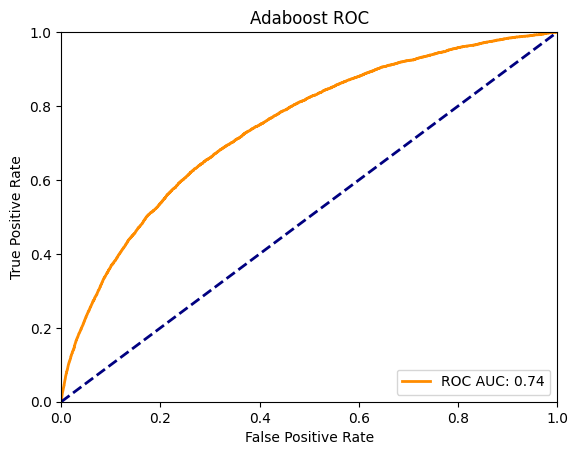

In [61]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC AUC: %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Adaboost ROC')
plt.legend(loc="lower right")
plt.show()

# Train Random Forest

In [62]:
randomForest = RandomForestClassifier(n_estimators = 50, random_state = 50, n_jobs = -1)
randomForest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=50)

# Get prediction accuracy

In [63]:
crossVal = cross_val_score(randomForest, X_train, y_train, cv=5)
print("Training Cross Validation: %0.2f" % (sum(crossVal) / float(len(crossVal)) * 100), "%")
accuracy = randomForest.score(X_test, y_test)
print("Accuraccy: ", accuracy * 100, "%")

Training Cross Validation: 91.94 %
Accuraccy:  91.92246671725185 %


# F1 Score

In [64]:
y_predicted = randomForest.predict(X_test)
print("F1 Score: ",f1_score(y_test, y_predicted))

F1 Score:  0.003161863067007175


# Confusion Matrix

Text(0.5, 0, 'Predicted label')

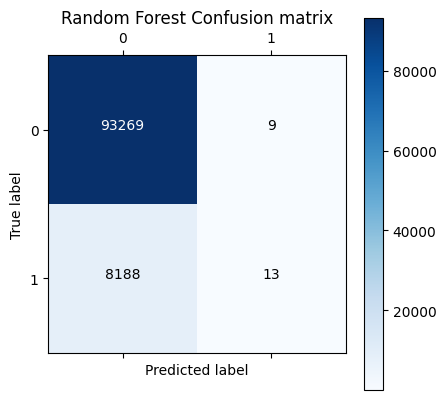

In [65]:
rf_confusion = metrics.confusion_matrix(y_test, y_predicted)
#rf_confusion = rf_confusion.astype('float') / rf_confusion.sum(axis=1)[:, np.newaxis]
plt.matshow(rf_confusion, cmap=plt.cm.Blues)
plt.grid(b=False)
plt.title("Random Forest Confusion matrix")
plt.colorbar()
thresh = rf_confusion.max() / 2.
for i, j in itertools.product(range(rf_confusion.shape[0]), range(rf_confusion.shape[1])):
    plt.text(j, i, rf_confusion[i, j],
    horizontalalignment="center",
    color="white" if rf_confusion[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Roc Graph

In [66]:
scores = randomForest.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, scores)
roc_auc = metrics.auc(fpr, tpr)

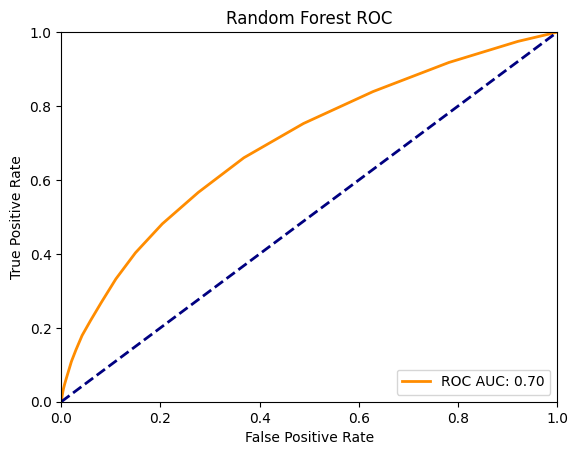

In [67]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC AUC: %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC')
plt.legend(loc="lower right")
plt.show()

# Train NN

In [68]:
nn = MLPClassifier()
nn.fit(X_train, y_train)

MLPClassifier()

# Get prediction accuracy

In [69]:
crossVal = cross_val_score(nn, X_train, y_train, cv=5)
print("Training Cross Validation: %0.2f" % (sum(crossVal) / float(len(crossVal)) * 100), "%")
accuracy = nn.score(X_test, y_test)
print("Accuraccy: ", accuracy * 100, "%")

Training Cross Validation: 90.11 %
Accuraccy:  90.27187891090767 %


# F1 Score

In [70]:
y_predicted = nn.predict(X_test)
print("F1 Score: ",f1_score(y_test, y_predicted))

F1 Score:  0.12590756153709934


# Confusion Matrix

Text(0.5, 0, 'Predicted label')

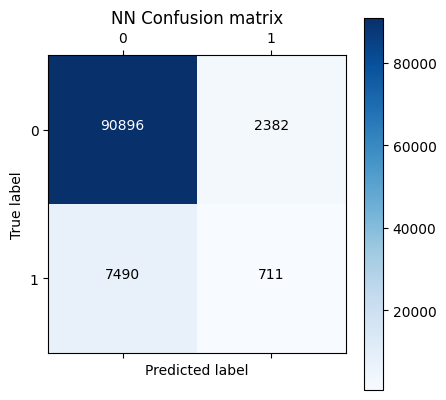

In [71]:
nn_confusion = metrics.confusion_matrix(y_test, y_predicted)
#nn_confusion = nn_confusion.astype('float') / nn_confusion.sum(axis=1)[:, np.newaxis]
plt.matshow(nn_confusion, cmap=plt.cm.Blues)
plt.grid(b=False)
plt.title("NN Confusion matrix")
plt.colorbar()
thresh = nn_confusion.max() / 2.
for i, j in itertools.product(range(nn_confusion.shape[0]), range(nn_confusion.shape[1])):
    plt.text(j, i, nn_confusion[i, j],
    horizontalalignment="center",
    color="white" if nn_confusion[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Roc graph

In [72]:
scores = nn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, scores)
roc_auc = metrics.auc(fpr, tpr)

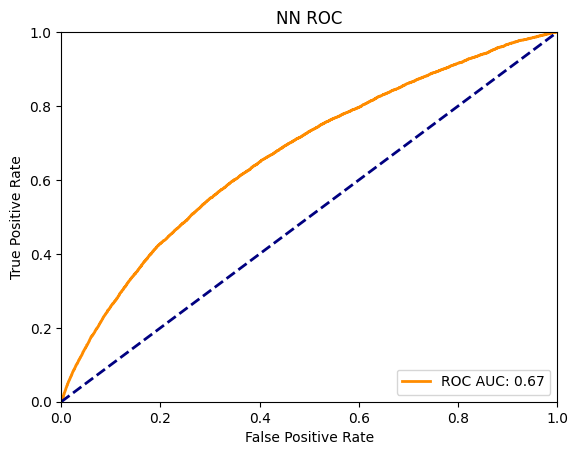

In [73]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC AUC: %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('NN ROC')
plt.legend(loc="lower right")
plt.show()